In [104]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from scipy import stats
import pandas as pd

In [105]:
r = np.random
r.seed(42)


# Problem 1 
### 1.1

In [106]:
# anlytical sol
#coin toss is binomial
p_coin = 0.5
rolls = 20
mu_tails = p_coin*rolls
sigma_tails = np.sqrt(rolls*p_coin*(1-p_coin))
#target hits is poisson
N = 2500
p = 0.004
lam = N*p
sigma_target = np.sqrt(lam)

Diff = mu_tails - lam
Sigma_Diff = np.sqrt(sigma_tails**2 + sigma_target**2)
Z = Diff/Sigma_Diff


print(f'mean tails= {mu_tails} ± {sigma_tails} , mean target= {lam} ± {sigma_target}')
print(f"Difference in means: {Diff:.2f} ± {Sigma_Diff:.2f}")
print(f"Analytical Z-score: {Z:.2f}")

# 25<target hits<250 analytical
# p_low = stats.poisson.cdf(25, lam)
# p_high = 1 - stats.poisson.cdf(250, lam)
# p_analytical = p_high - p_low
p_analytical = stats.poisson.cdf(250, lam) - stats.poisson.cdf(25, lam)
print(f"Analytical p-value for 25 < target hits < 250: {p_analytical:.10f}")

p_coin_eq_10 = stats.binom.pmf(10, rolls, p_coin)
p_target_eq_20 = stats.poisson.pmf(20, lam)
p_joint_eq_10_20 = p_coin_eq_10 * p_target_eq_20
print(f"Analytical joint probability P(tails=10, hits=20): {p_joint_eq_10_20:.10f}")


mean tails= 10.0 ± 2.23606797749979 , mean target= 10.0 ± 3.1622776601683795
Difference in means: 0.00 ± 3.87
Analytical Z-score: 0.00
Analytical p-value for 25 < target hits < 250: 0.0000176803
Analytical joint probability P(tails=10, hits=20): 0.0003287980


simulated mean tails= 10.003075 ± 2.235859911616781 , mean target= 9.994038 ± 3.159784874727392
Simulated mean difference: 0.01 ± 3.87
Simulated Z-score: 0.00
Probability tails > targets: 0.4608
Probability targets > tails: 0.4366


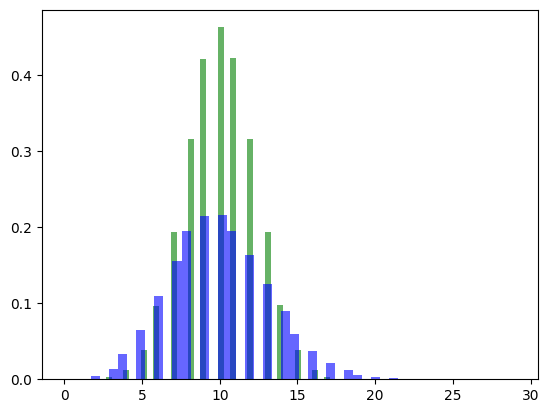

In [107]:
# simulation
n_experiments = 1000000
tails = r.binomial(rolls, p_coin, n_experiments)
targets = r.poisson(lam, n_experiments)
print(f'simulated mean tails= {np.mean(tails)} ± {np.std(tails)} , mean target= {np.mean(targets)} ± {np.std(targets)}')
diffs = tails - targets
mean_diff = np.mean(tails) - np.mean(targets)
std_diff = np.std(diffs)
z_score = mean_diff / std_diff
print(f"Simulated mean difference: {mean_diff:.2f} ± {std_diff:.2f}")
print(f"Simulated Z-score: {z_score:.2f}")
p_tails_bigger = np.mean(diffs > 0)
print(f"Probability tails > targets: {p_tails_bigger:.4f}")
p_targets_bigger = np.mean(diffs < 0)
print(f"Probability targets > tails: {p_targets_bigger:.4f}")
# plot
plt.hist(tails, bins=50, density=True, alpha=0.6, color='g')
plt.hist(targets, bins=50, density=True, alpha=0.6, color='b');



# Problem 2
### 2.1

In [108]:
import sympy as sp

#symbolic error propagation
x, y = sp.symbols('x y')
sx,sy = sp.symbols('sigma_x sigma_y')
z = sp.cos(x**2) / sp.ln(x*y)

dz_dx = sp.diff(z, x)
dz_dy = sp.diff(z, y)

sigma_z = sp.sqrt((dz_dx * sx)**2 + (dz_dy * sy)**2)
sp.simplify(sigma_z)

#numbers
x_val = 1.71
y_val = 10.1
sx_val = 0.05
sy_val = 0.3

z_val = z.evalf(subs={x: x_val, y: y_val})
sigma_z_val = sigma_z.evalf(subs={x: x_val, y: y_val, sx: sx_val, sy: sy_val})
print(f"z = {z_val:.5f} ± {sigma_z_val:.5f}")

#add linear correlation
#symbolic error propagation with correlation
rho = sp.symbols('rho')
covxy = rho * sx * sy
sigma_z_corr = sp.sqrt((dz_dx * sx)**2 + (dz_dy * sy)**2 + 2 * dz_dx * dz_dy * covxy)

#numbers

rho_val = 0.87

covxy = rho_val * sx_val * sy_val
sigma_z_corr_val = sigma_z_corr.evalf(subs={x: x_val, y: y_val, sx: sx_val, sy: sy_val, rho: rho_val})
print(f"With correlation (rho={rho_val}), z = {z_val:.5f} ± {sigma_z_corr_val:.5f}")


z = -0.34273 ± 0.01009
With correlation (rho=0.87), z = -0.34273 ± 0.00657


### 2.2

In [109]:

dataframe = pd.read_csv('data_WaterDensity.csv', header=0)
temp, density = dataframe.values.T
dataframe

,# Temp,Density
0,0.2,0.999854
1,0.2,0.999857
2,0.2,0.999867
3,0.2,0.999858
4,0.2,0.999833
...,...,...
95,7.8,0.999865
96,7.8,0.999861
97,7.8,0.999863
98,7.8,0.999865


Temperature 0.2: Mean = 0.999855 ± 0.000003
Temperature 2.3: Mean = 0.999952 ± 0.000003
Temperature 3.9: Mean = 0.999972 ± 0.000003
Temperature 5.9: Mean = 0.999951 ± 0.000004
Temperature 7.8: Mean = 0.999865 ± 0.000004


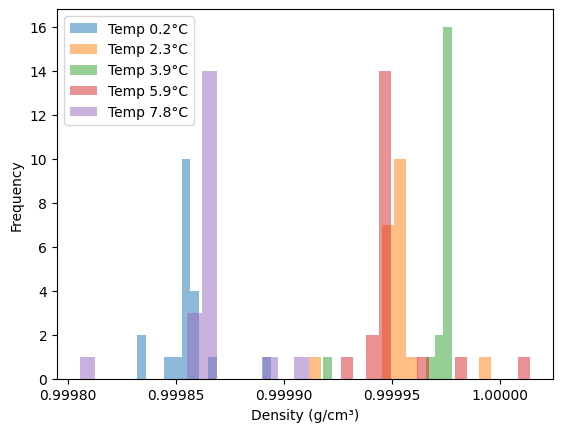

In [128]:
# Group densities by temperature using np.unique
unique_temps = np.unique(temp)

# Create list of density arrays for each temperature
density_groups = [density[temp == t] for t in unique_temps]

# Display the groups
# for i, t in enumerate(unique_temps):
#     print(f"Temperature {t}: {density_groups[i]}")
#     print(f"  Mean: {np.mean(density_groups[i]):.6f}, Std: {np.std(density_groups[i], ddof=1):.6f}\n")
# calc means and stds
means = [np.mean(density_groups[i]) for i in range(len(unique_temps))]
stds = [np.std(density_groups[i], ddof=1) for i in range(len(unique_temps))]
err = [stds[i]/np.sqrt(len(density_groups[i])) for i in range(len(unique_temps))]
# print results
for i, t in enumerate(unique_temps):
    print(f"Temperature {t}: Mean = {means[i]:.6f} ± {err[i]:.6f}")


#plot the different groups
for i, t in enumerate(unique_temps):
    plt.hist(density_groups[i], bins=15, alpha=0.5, label=f'Temp {t}°C')
plt.xlabel('Density (g/cm³)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [130]:
from scipy.stats import norm

def iterative_chauvenet_clip(data):
    """
    Iteratively remove outliers using Chauvenet's criterion.
    Rejects a point if probability of deviation >= observed is < 1/(2N)
    """
    data = np.asarray(data, dtype=float)

    while len(data) > 2:
        N = len(data)
        mu = np.mean(data)
        sigma = np.std(data, ddof=1)

        if sigma == 0:
            break

        # Calculate z-scores for all points
        distances = np.abs(data - mu)
        idx = np.argmax(distances)
        
        z = distances[idx] / sigma
        # Two-sided probability
        p_value = 2 * (1 - norm.cdf(z))
        
        # Chauvenet's criterion: reject if p_value < 1/(2N)
        chauvenet_threshold = 1 / (2 * N)
        
        if p_value < chauvenet_threshold:
            print(
                f"Removed value = {data[idx]:.6g}, "
                f"z = {z:.3f}σ, "
                f"p = {p_value:.3e}, "
                f"threshold = {chauvenet_threshold:.3e}"
            )
            data = np.delete(data, idx)
        else:
            break

    return data



--- Temperature 0.2°C ---
Original data: N = 20
Removed value = 0.999894, z = 3.188σ, p = 1.433e-03, threshold = 2.500e-02
Removed value = 0.999832, z = 2.566σ, p = 1.029e-02, threshold = 2.632e-02
Removed value = 0.999833, z = 3.239σ, p = 1.199e-03, threshold = 2.778e-02
Removed value = 0.999867, z = 2.876σ, p = 4.034e-03, threshold = 2.941e-02
Removed value = 0.999847, z = 2.886σ, p = 3.898e-03, threshold = 3.125e-02
Removed value = 0.999851, z = 2.495σ, p = 1.259e-02, threshold = 3.333e-02
Cleaned data: N = 14
Mean = 0.9998557 ± 0.0000004


--- Temperature 2.3°C ---
Original data: N = 20
Removed value = 0.999996, z = 3.144σ, p = 1.664e-03, threshold = 2.500e-02
Removed value = 0.999912, z = 4.004σ, p = 6.222e-05, threshold = 2.632e-02
Removed value = 0.999958, z = 2.253σ, p = 2.424e-02, threshold = 2.778e-02
Cleaned data: N = 17
Mean = 0.9999518 ± 0.0000005


--- Temperature 3.9°C ---
Original data: N = 20
Removed value = 0.999918, z = 4.200σ, p = 2.673e-05, threshold = 2.500e-02
R

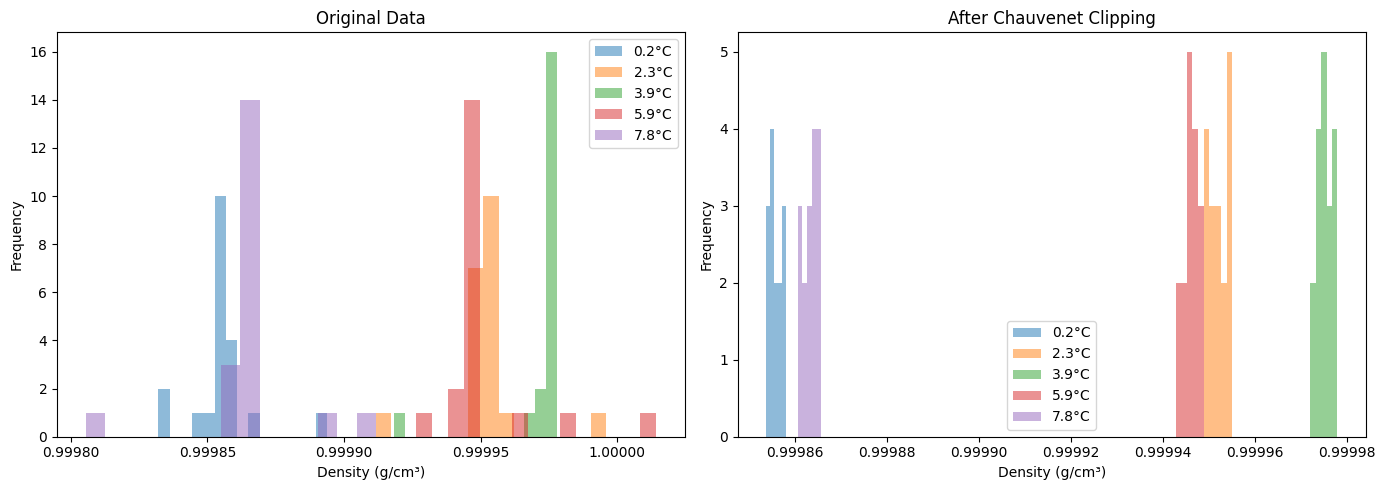

In [135]:
# Apply Chauvenet's criterion to each temperature group
cleaned_groups = []
cleaned_means = []
cleaned_stds = []
cleaned_errs = []

for i, t in enumerate(unique_temps):
    print(f"\n--- Temperature {t}°C ---")
    print(f"Original data: N = {len(density_groups[i])}")
    
    # Apply Chauvenet's criterion
    cleaned_data = iterative_chauvenet_clip(density_groups[i])
    cleaned_groups.append(cleaned_data)
    
    # Calculate statistics on cleaned data
    mean = np.mean(cleaned_data)
    std = np.std(cleaned_data, ddof=1)
    err = std / np.sqrt(len(cleaned_data))
    
    cleaned_means.append(mean)
    cleaned_stds.append(std)
    cleaned_errs.append(err)
    
    print(f"Cleaned data: N = {len(cleaned_data)}")
    print(f"Mean = {mean:.7f} ± {err:.7f}\n")

# Plot cleaned vs original
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Original data
for i, t in enumerate(unique_temps):
    ax1.hist(density_groups[i], bins=15, alpha=0.5, label=f'{t}°C')
ax1.set_xlabel('Density (g/cm³)')
ax1.set_ylabel('Frequency')
ax1.set_title('Original Data')
ax1.legend()

# Cleaned data
for i, t in enumerate(unique_temps):
    ax2.hist(cleaned_groups[i], bins=5, alpha=0.5, label=f'{t}°C')
ax2.set_xlabel('Density (g/cm³)')
ax2.set_ylabel('Frequency')
ax2.set_title('After Chauvenet Clipping')
ax2.legend()

plt.tight_layout()
plt.show()

In [136]:
# Find temperature with highest mean density
max_idx = np.argmax(cleaned_means)
max_temp = unique_temps[max_idx]

print(f"Highest density at temperature: {max_temp}°C")
print(f"Mean density: {cleaned_means[max_idx]:.6f} ± {cleaned_errs[max_idx]:.6f}")

# Check if highest is significantly higher than others
print("\n--- Difference in standard deviations ---")
for i, t in enumerate(unique_temps):
    if i != max_idx:
        diff = cleaned_means[max_idx] - cleaned_means[i]
        combined_err = np.sqrt(cleaned_errs[max_idx]**2 + cleaned_errs[i]**2)
        z_score = diff / combined_err
        print(f"{max_temp}°C - {t}°C: Δ={diff:.6f}, σ_combined={combined_err:.6f}, Z={z_score:.2f}")
        if z_score > 2:
            print(f"  → Significantly higher (>2σ)")



Highest density at temperature: 3.9°C
Mean density: 0.999975 ± 0.000000

--- Difference in standard deviations ---
3.9°C - 0.2°C: Δ=0.000119, σ_combined=0.000001, Z=226.46
  → Significantly higher (>2σ)
3.9°C - 2.3°C: Δ=0.000023, σ_combined=0.000001, Z=37.39
  → Significantly higher (>2σ)
3.9°C - 5.9°C: Δ=0.000029, σ_combined=0.000001, Z=50.75
  → Significantly higher (>2σ)
3.9°C - 7.8°C: Δ=0.000112, σ_combined=0.000001, Z=203.52
  → Significantly higher (>2σ)


Text(0.5, 1.0, 'Mean Water Density vs Temperature with cleaned data')

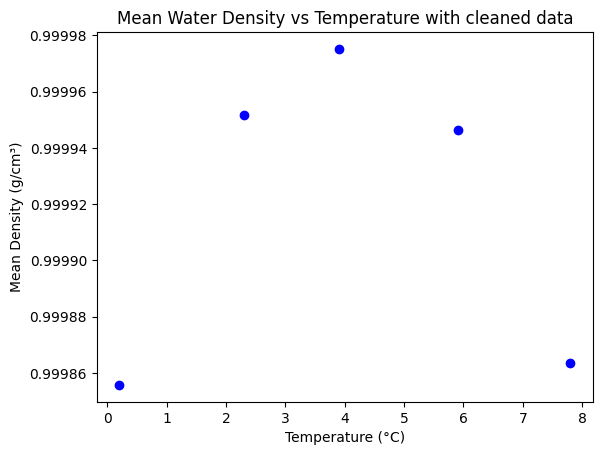

In [140]:
plt.scatter(unique_temps, cleaned_means, color='blue', label='Mean Densities')

plt.xlabel('Temperature (°C)')
plt.ylabel('Mean Density (g/cm³)')
plt.title('Mean Water Density vs Temperature with cleaned data')

In [145]:
def func_water_density(x, a,b, c):
    return a + b*x + c * x**2

cfit = cost.LeastSquares(unique_temps, cleaned_means, cleaned_errs, func_water_density)
m = Minuit(cfit, a=1.0, b=0.0, c=-8e-6)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 27.16 (χ²/ndof = 13.6)     │              Nfcn = 66               │
│ EDM = 7.25e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │999.8435e-3│ 0.0004e-3 │            │            │         │         │       │
│ 1 │ b    │ 64.89e-6  │  0.24e-6  │            │            │         │         │       │
│ 2 │ c    │ -8.001e-6 │ 0.029e-6  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         a         b         c │
├───┼───────────────────────────────┤
│ a │  1.55e-13 -0.07e-12   6.6e-15 │
│ b │ -0.07e-12  5.56e-14  -6.5e-15 │
│ c │   6.6e-15  -6.5e-15  8.27e-16 │
└───┴───────────────────────────────┘

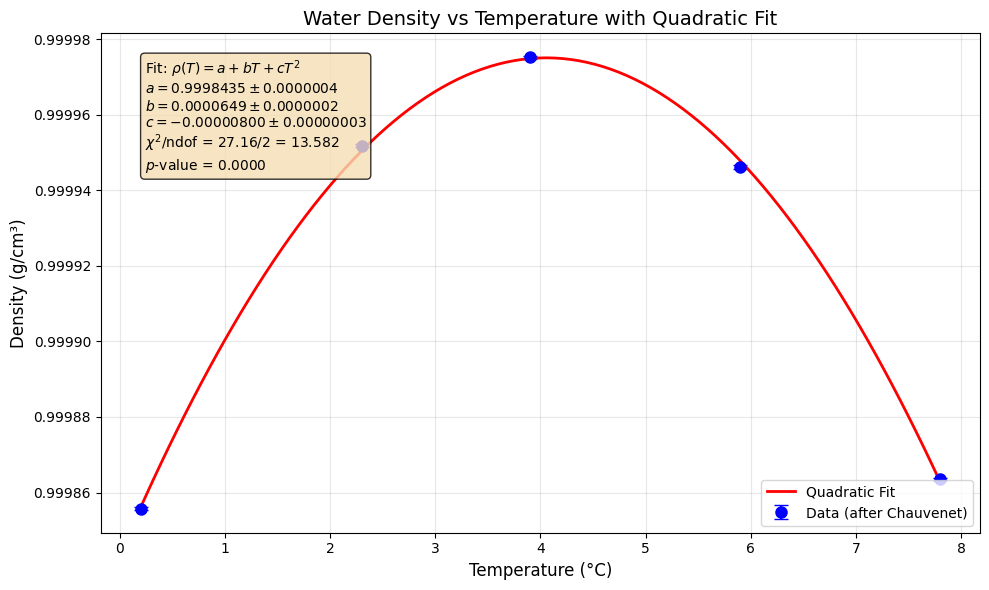


=== Fit Results ===
a = 9.998e-01 ± 3.935e-07
b = 6.489228e-05 ± 2.357527e-07
c = -8.000792e-06 ± 2.875159e-08

χ² = 27.16
ndof = 2
χ²/ndof = 13.582
p-value = 0.0000


In [161]:

# Get fit results
a_fit = m.values['a']
b_fit = m.values['b']
c_fit = m.values['c']
a_err = m.errors['a']
b_err = m.errors['b']
c_err = m.errors['c']

# Calculate chi-square statistics
chi2 = m.fval
ndof = len(unique_temps) - m.nfit
chi2_ndof = chi2 / ndof
p_value = stats.chi2.sf(chi2, ndof)

# Create smooth curve for plotting
temp_smooth = np.linspace(unique_temps.min(), unique_temps.max(), 200)
density_fit = func_water_density(temp_smooth, a_fit, b_fit, c_fit)

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(unique_temps, cleaned_means, yerr=cleaned_errs, 
             fmt='o', color='blue', markersize=8, capsize=5, 
             label='Data (after Chauvenet)')
plt.plot(temp_smooth, density_fit, 'r-', linewidth=2, label='Quadratic Fit')

# Create legend text
legend_text = (
    f'Fit: $\\rho(T) = a + bT + cT^2$\n'
    f'$a = {a_fit:.7f} \\pm {a_err:.7f}$\n'
    f'$b = {b_fit:.7f} \\pm {b_err:.7f}$\n'
    f'$c = {c_fit:.8f} \\pm {c_err:.8f}$\n'
    f'$\\chi^2$/ndof = {chi2:.2f}/{ndof} = {chi2_ndof:.3f}\n'
    f'$p$-value = {p_value:.4f}'
)

plt.text(0.05, 0.95, legend_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Density (g/cm³)', fontsize=12)
plt.title('Water Density vs Temperature with Quadratic Fit', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print fit summary
print(f"\n=== Fit Results ===")
print(f"a = {a_fit:.3e} ± {a_err:.3e}")
print(f"b = {b_fit:.6e} ± {b_err:.6e}")
print(f"c = {c_fit:.6e} ± {c_err:.6e}")
print(f"\nχ² = {chi2:.2f}")
print(f"ndof = {ndof}")
print(f"χ²/ndof = {chi2_ndof:.3f}")
print(f"p-value = {p_value:.4f}")

This is visually a good fit, but as we only have 5 points and 3 params, the p value is very low. I would thus argue that we cant reject that the formuala is correct without getting more points.


=== Maximum Density from Fit ===
Temperature at maximum density: T_max = 4.06 ± 0.02 °C
Maximum density: ρ_max = 0.999975 ± 0.000001 g/cm³


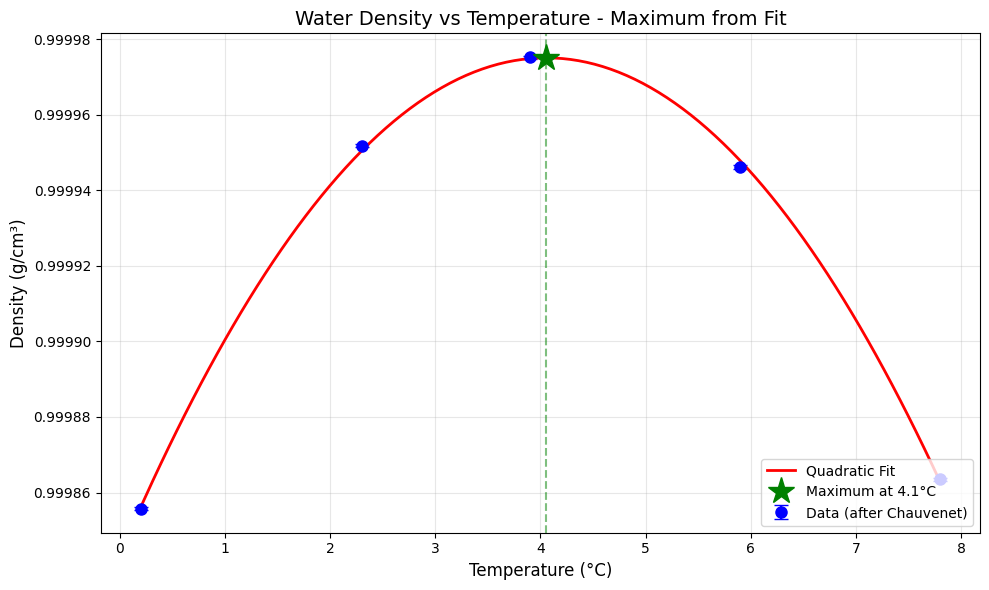

In [162]:
# Find temperature with maximum density from the fit
# For ρ(T) = a + bT + cT², the maximum occurs at dρ/dT = 0
# dρ/dT = b + 2cT = 0  →  T_max = -b/(2c)

T_max = -b_fit / (2 * c_fit)

# Calculate the maximum density value
rho_max = func_water_density(T_max, a_fit, b_fit, c_fit)

# Propagate uncertainty using error propagation
# σ(T_max)² = (∂T_max/∂b)² σ_b² + (∂T_max/∂c)² σ_c²
# ∂T_max/∂b = -1/(2c)
# ∂T_max/∂c = b/(2c²)

dTmax_db = -1 / (2 * c_fit)
dTmax_dc = b_fit / (2 * c_fit**2)

sigma_Tmax = np.sqrt((dTmax_db * b_err)**2 + (dTmax_dc * c_err)**2)

# Propagate uncertainty for rho_max
# dρ/da = 1, dρ/db = T_max, dρ/dc = T_max²
drho_da = 1
drho_db = T_max
drho_dc = T_max**2

sigma_rho_max = np.sqrt(
    (drho_da * a_err)**2 + 
    (drho_db * b_err)**2 + 
    (drho_dc * c_err)**2
)

print(f"\n=== Maximum Density from Fit ===")
print(f"Temperature at maximum density: T_max = {T_max:.2f} ± {sigma_Tmax:.2f} °C")
print(f"Maximum density: ρ_max = {rho_max:.6f} ± {sigma_rho_max:.6f} g/cm³")

# Visualize on plot
plt.figure(figsize=(10, 6))
plt.errorbar(unique_temps, cleaned_means, yerr=cleaned_errs, 
             fmt='o', color='blue', markersize=8, capsize=5, 
             label='Data (after Chauvenet)')
plt.plot(temp_smooth, density_fit, 'r-', linewidth=2, label='Quadratic Fit')

# Mark the maximum
plt.plot(T_max, rho_max, 'g*', markersize=20, label=f'Maximum at {T_max:.1f}°C', zorder=10)
plt.axvline(T_max, color='green', linestyle='--', alpha=0.5)

plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Density (g/cm³)', fontsize=12)
plt.title('Water Density vs Temperature - Maximum from Fit', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.3

In [166]:
#analytical
beta,beta_err = sp.symbols('beta sigma_beta')
lorentz = 1 / sp.sqrt(1 - beta**2)
lorentz_dbeta = sp.diff(lorentz, beta)
sigma_lorentz = lorentz_dbeta * beta_err

#numbers
beta_val = 0.50
beta_err_val = 0.02
lorentz_val = lorentz.evalf(subs={beta: beta_val})
sigma_lorentz_val = sigma_lorentz.evalf(subs={beta: beta_val, beta_err: beta_err_val})
print(f"Lorentz factor γ = {lorentz_val:.5f} ± {sigma_lorentz_val:.5f}")

beta_val2 = 0.95
lorentz_val2 = lorentz.evalf(subs={beta: beta_val2})
sigma_lorentz_val2 = sigma_lorentz.evalf(subs={beta: beta_val2, beta_err: beta_err_val})
print(f"Lorentz factor γ = {lorentz_val2:.5f} ± {sigma_lorentz_val2:.5f}")


Lorentz factor γ = 1.15470 ± 0.01540
Lorentz factor γ = 3.20256 ± 0.62409


In [167]:
# For β = 0.95, calculate asymmetric uncertainties
beta_val2 = 0.95
beta_err_val = 0.02

# Calculate γ at β ± σ_β
beta_low = beta_val2 - beta_err_val
beta_high = beta_val2 + beta_err_val

gamma_center = 1 / np.sqrt(1 - beta_val2**2)
gamma_low = 1 / np.sqrt(1 - beta_low**2)
gamma_high = 1 / np.sqrt(1 - beta_high**2)

# Asymmetric uncertainties
sigma_low = gamma_center - gamma_low
sigma_high = gamma_high - gamma_center

print(f"\n=== Asymmetric Uncertainty Analysis (β = {beta_val2}) ===")
print(f"γ = {gamma_center:.4f} + {sigma_high:.4f} - {sigma_low:.4f}")
print(f"\nSymmetric (linear approximation): γ = {lorentz_val2:.5f} ± {sigma_lorentz_val2:.5f}")
print(f"Note: At high β, linear approximation underestimates the uncertainty!")


=== Asymmetric Uncertainty Analysis (β = 0.95) ===
γ = 3.2026 + 0.9109 - 0.4819

Symmetric (linear approximation): γ = 3.20256 ± 0.62409
Note: At high β, linear approximation underestimates the uncertainty!


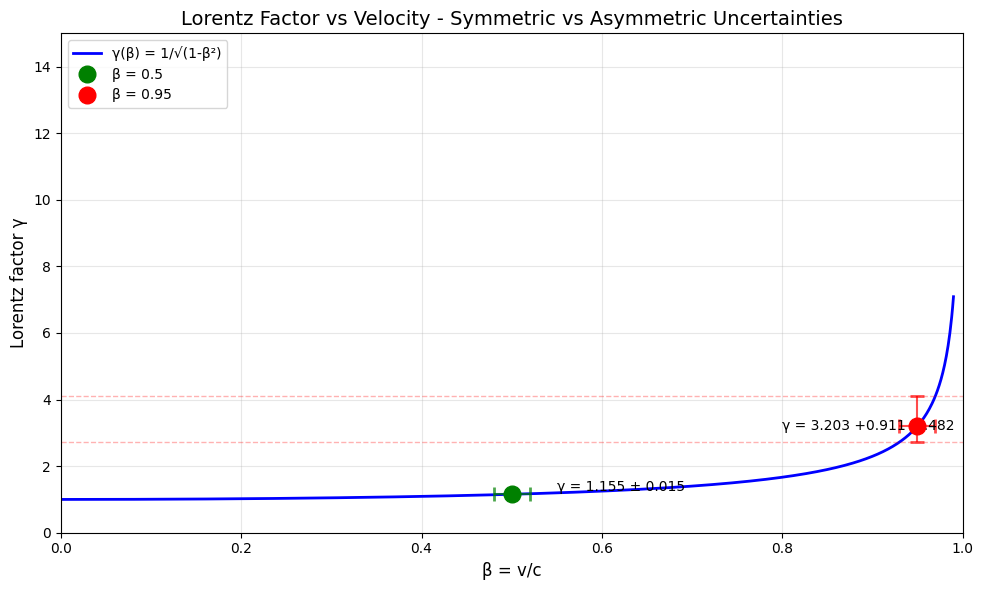


=== Comparison ===
At β = 0.5:
  Symmetric uncertainty: ±0.0154

At β = 0.95:
  Symmetric (linear approx): ±0.6241
  Asymmetric (exact): +0.9109 / -0.4819
  Asymmetry ratio: 1.89


In [168]:
# Plot the Lorentz factor function
beta_range = np.linspace(0, 0.99, 1000)
gamma_range = 1 / np.sqrt(1 - beta_range**2)

plt.figure(figsize=(10, 6))
plt.plot(beta_range, gamma_range, 'b-', linewidth=2, label='γ(β) = 1/√(1-β²)')

# Mark β = 0.50
beta_val = 0.50
gamma_val = 1 / np.sqrt(1 - beta_val**2)
plt.plot(beta_val, gamma_val, 'go', markersize=12, label=f'β = {beta_val}', zorder=5)
plt.errorbar(beta_val, gamma_val, xerr=beta_err_val, 
             fmt='go', capsize=5, capthick=2, alpha=0.7)

# Mark β = 0.95 with asymmetric error bars
plt.plot(beta_val2, gamma_center, 'ro', markersize=12, label=f'β = {beta_val2}', zorder=5)
# Plot asymmetric error bars
plt.errorbar(beta_val2, gamma_center, 
             xerr=[[beta_err_val], [beta_err_val]],
             yerr=[[sigma_low], [sigma_high]],
             fmt='ro', capsize=5, capthick=2, alpha=0.7)

# Add horizontal lines to show asymmetry
plt.axhline(gamma_low, color='red', linestyle='--', alpha=0.3, linewidth=1)
plt.axhline(gamma_high, color='red', linestyle='--', alpha=0.3, linewidth=1)

# Annotations
plt.text(beta_val + 0.05, gamma_val, 
         f'γ = {gamma_val:.3f} ± {float(sigma_lorentz_val):.3f}', 
         fontsize=10, verticalalignment='bottom')
plt.text(beta_val2 - 0.15, gamma_center, 
         f'γ = {gamma_center:.3f} +{sigma_high:.3f} -{sigma_low:.3f}', 
         fontsize=10, verticalalignment='center')

plt.xlabel('β = v/c', fontsize=12)
plt.ylabel('Lorentz factor γ', fontsize=12)
plt.title('Lorentz Factor vs Velocity - Symmetric vs Asymmetric Uncertainties', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 15)
plt.tight_layout()
plt.show()

print(f"\n=== Comparison ===")
print(f"At β = {beta_val}:")
print(f"  Symmetric uncertainty: ±{float(sigma_lorentz_val):.4f}")
print(f"\nAt β = {beta_val2}:")
print(f"  Symmetric (linear approx): ±{float(sigma_lorentz_val2):.4f}")
print(f"  Asymmetric (exact): +{sigma_high:.4f} / -{sigma_low:.4f}")
print(f"  Asymmetry ratio: {sigma_high/sigma_low:.2f}")

we ca see the function is much steeper as we approach light speeds. On the plot we can clearly see that for beta = 0.95, if we increase a little, we will have a massive increase in lorentz factor. Thus the error propagation cannot be assumed to be linear.

# Problem 3
### 3.1

=== Random Harmonic Series Statistics ===
N = 25, Number of experiments = 10000
Mean: -0.0049
Std Dev: 1.2767
Median: -0.0047
Min: -3.1343
Max: 3.2581


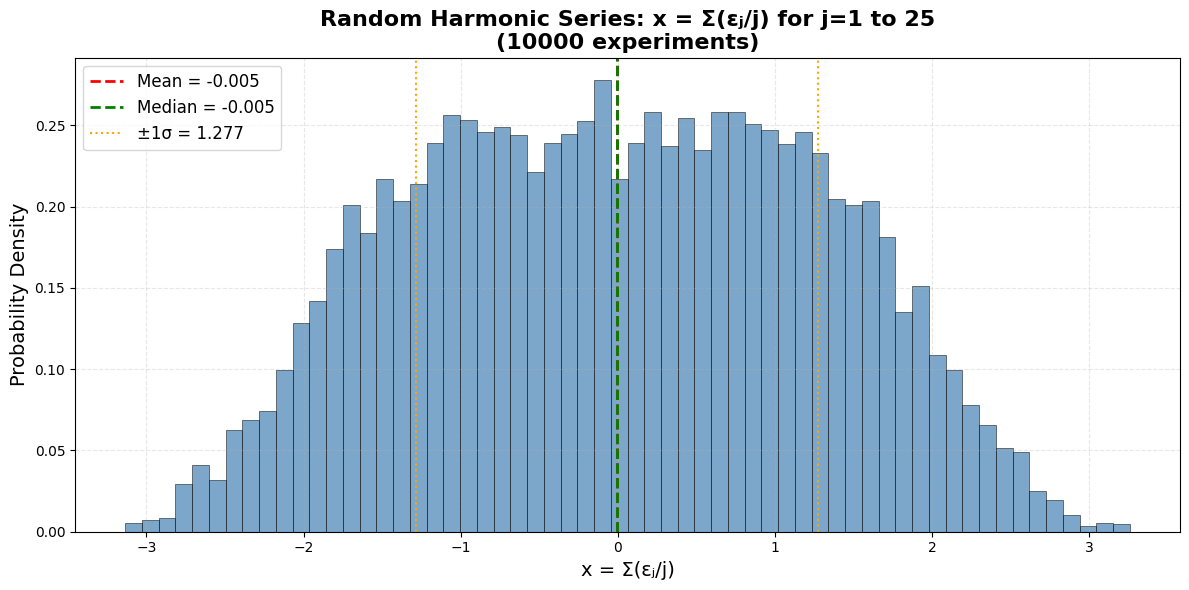

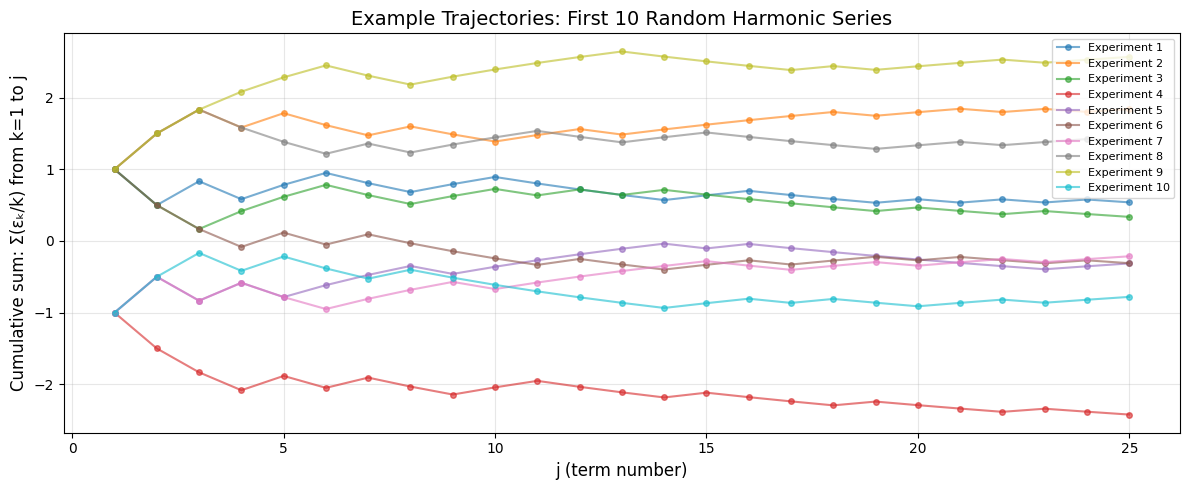

In [174]:

N_harmonic = 25
n_exp = 10000

epsilon = r.choice([-1, 1], size=(n_exp, N_harmonic))


j_values = np.arange(1, N_harmonic + 1)


x_values = np.sum(epsilon / j_values, axis=1)

# Statistics
mean_x = np.mean(x_values)
std_x = np.std(x_values)
median_x = np.median(x_values)

print(f"=== Random Harmonic Series Statistics ===")
print(f"N = {N_harmonic}, Number of experiments = {n_exp}")
print(f"Mean: {mean_x:.4f}")
print(f"Std Dev: {std_x:.4f}")
print(f"Median: {median_x:.4f}")
print(f"Min: {np.min(x_values):.4f}")
print(f"Max: {np.max(x_values):.4f}")

# Create beautiful histogram
plt.figure(figsize=(12, 6))

# Plot histogram
counts, bins, patches = plt.hist(x_values, bins=60, density=True, 
                                  alpha=0.7, color='steelblue', 
                                  edgecolor='black', linewidth=0.5)

# Add statistics lines
plt.axvline(mean_x, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_x:.3f}')
plt.axvline(median_x, color='green', linestyle='--', linewidth=2, label=f'Median = {median_x:.3f}')
plt.axvline(mean_x + std_x, color='orange', linestyle=':', linewidth=1.5, label=f'±1σ = {std_x:.3f}')
plt.axvline(mean_x - std_x, color='orange', linestyle=':', linewidth=1.5)

# Labels and title
plt.xlabel('x = Σ(εⱼ/j)', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title(f'Random Harmonic Series: x = Σ(εⱼ/j) for j=1 to {N_harmonic}\n({n_exp} experiments)', 
          fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Additional plot: Show individual experiment examples
fig, ax = plt.subplots(figsize=(12, 5))

# Plot first 5 experiments as examples
for i in range(10):
    cumsum = np.cumsum(epsilon[i] / j_values)
    ax.plot(j_values, cumsum, alpha=0.6, marker='o', markersize=4, label=f'Experiment {i+1}')

ax.set_xlabel('j (term number)', fontsize=12)
ax.set_ylabel('Cumulative sum: Σ(εₖ/k) from k=1 to j', fontsize=12)
ax.set_title('Example Trajectories: First 10 Random Harmonic Series', fontsize=14)
ax.legend(loc = 'upper right', fontsize=8)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



=== Symmetry Tests ===

Mean: -0.004940
Median: -0.004737

Skewness: -0.001660
(Perfectly symmetric distribution has skewness = 0)

Skewness test:
  Z-score: -0.0678
  p-value: 0.945934
  → Cannot reject H0: Distribution is symmetric (skewness = 0)

=== Count Analysis ===
Positive values: 4988 (49.88%)
Negative values: 5012 (50.12%)
Zero values: 0

Binomial test (H0: P(x>0) = 0.5):
  p-value: 0.818093
  → Cannot reject H0: Equal probability of positive/negative


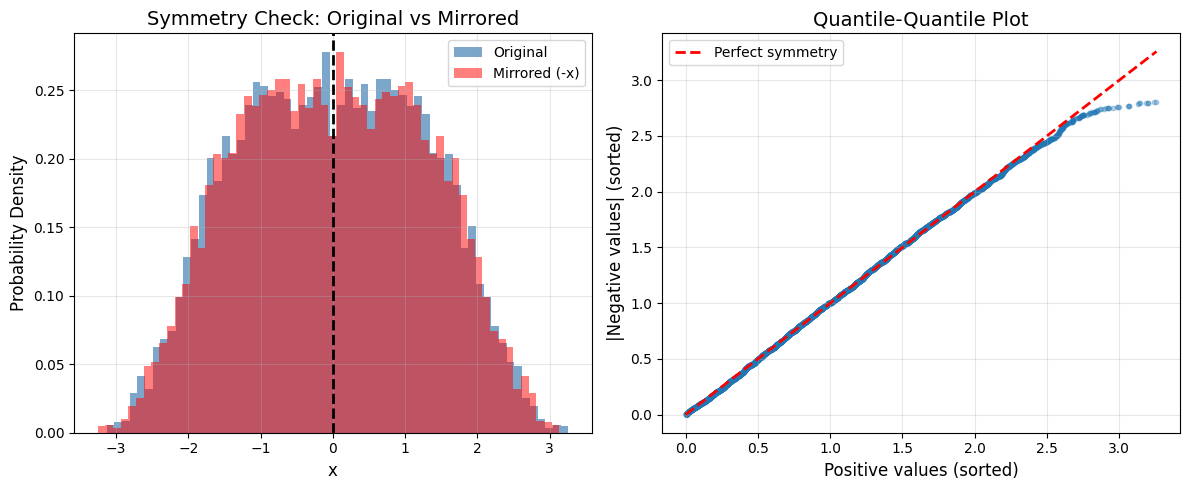

In [181]:
# Test for symmetry around 0

print("=== Symmetry Tests ===\n")

# 1. Basic checks
print(f"Mean: {mean_x:.6f}")
print(f"Median: {median_x:.6f}")

# 2. Skewness test
from scipy.stats import skew, skewtest
skewness = skew(x_values)
print(f"\nSkewness: {skewness:.6f}")
print(f"(Perfectly symmetric distribution has skewness = 0)")

# Statistical test for skewness
skew_z, skew_p = skewtest(x_values)
print(f"\nSkewness test:")
print(f"  Z-score: {skew_z:.4f}")
print(f"  p-value: {skew_p:.6f}")
if skew_p > 0.05:
    print("  → Cannot reject H0: Distribution is symmetric (skewness = 0)")
else:
    print("  → Reject H0: Distribution has significant skewness")

# 3. Compare counts of positive vs negative values
n_positive = np.sum(x_values > 0)
n_negative = np.sum(x_values < 0)
n_zero = np.sum(x_values == 0)

print(f"\n=== Count Analysis ===")
print(f"Positive values: {n_positive} ({n_positive/n_exp*100:.2f}%)")
print(f"Negative values: {n_negative} ({n_negative/n_exp*100:.2f}%)")
print(f"Zero values: {n_zero}")

# Binomial test: if symmetric, p(positive) = 0.5
from scipy.stats import binomtest
result = binomtest(n_positive, n_positive + n_negative, 0.5)
print(f"\nBinomial test (H0: P(x>0) = 0.5):")
print(f"  p-value: {result.pvalue:.6f}")
if result.pvalue > 0.05:
    print("  → Cannot reject H0: Equal probability of positive/negative")
else:
    print("  → Reject H0: Unequal probabilities")

# 4. Visual symmetry test
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(x_values, bins=60, density=True, alpha=0.7, color='steelblue', label='Original')
plt.hist(-x_values, bins=60, density=True, alpha=0.5, color='red', label='Mirrored (-x)')
plt.axvline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Symmetry Check: Original vs Mirrored', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Compare quantiles
plt.subplot(1, 2, 2)
sorted_positive = np.sort(x_values[x_values > 0])
sorted_negative = np.sort(-x_values[x_values < 0])  # Take absolute values

# Match lengths
min_len = min(len(sorted_positive), len(sorted_negative))
plt.scatter(sorted_positive[:min_len], sorted_negative[:min_len], alpha=0.3, s=10)
plt.plot([0, max(sorted_positive[:min_len])], [0, max(sorted_positive[:min_len])], 
         'r--', linewidth=2, label='Perfect symmetry')
plt.xlabel('Positive values (sorted)', fontsize=12)
plt.ylabel('|Negative values| (sorted)', fontsize=12)
plt.title('Quantile-Quantile Plot', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== Random Harmonic Series Statistics ===
N = 250, Number of experiments = 10000
Mean: 0.0131
Std Dev: 1.2782
Median: 0.0190
Min: -3.4880
Max: 3.7658


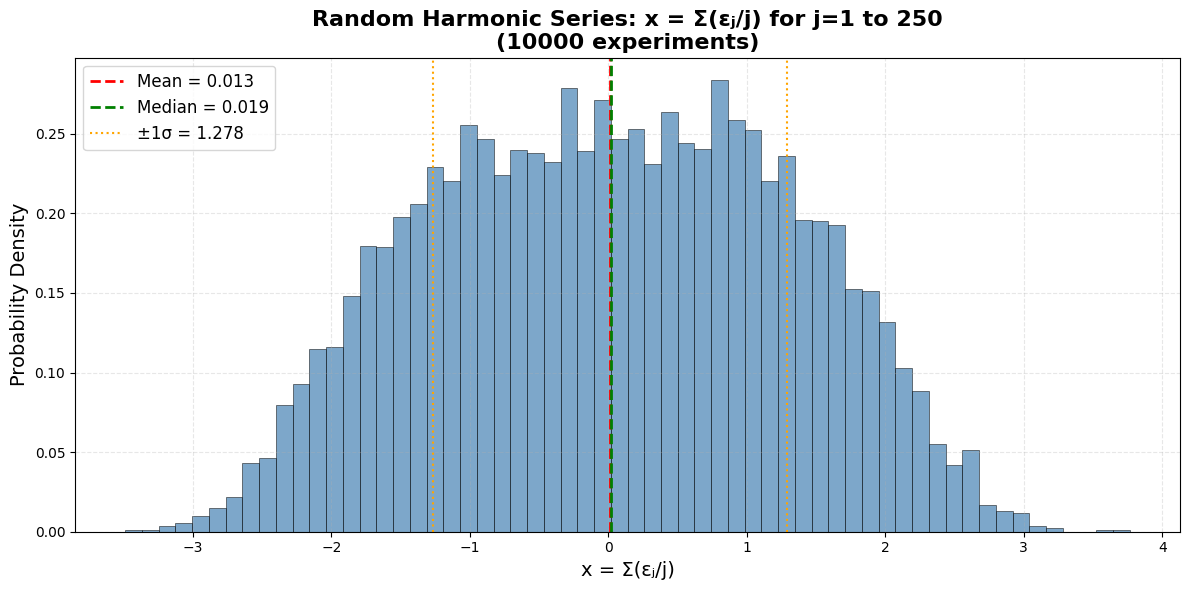

In [182]:

N_harmonic = 250
n_exp = 10000

epsilon = r.choice([-1, 1], size=(n_exp, N_harmonic))


j_values = np.arange(1, N_harmonic + 1)


x_values = np.sum(epsilon / j_values, axis=1)

# Statistics
mean_x = np.mean(x_values)
std_x = np.std(x_values)
median_x = np.median(x_values)

print(f"=== Random Harmonic Series Statistics ===")
print(f"N = {N_harmonic}, Number of experiments = {n_exp}")
print(f"Mean: {mean_x:.4f}")
print(f"Std Dev: {std_x:.4f}")
print(f"Median: {median_x:.4f}")
print(f"Min: {np.min(x_values):.4f}")
print(f"Max: {np.max(x_values):.4f}")

# Create beautiful histogram
plt.figure(figsize=(12, 6))

# Plot histogram
counts, bins, patches = plt.hist(x_values, bins=60, density=True, 
                                  alpha=0.7, color='steelblue', 
                                  edgecolor='black', linewidth=0.5)

# Add statistics lines
plt.axvline(mean_x, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_x:.3f}')
plt.axvline(median_x, color='green', linestyle='--', linewidth=2, label=f'Median = {median_x:.3f}')
plt.axvline(mean_x + std_x, color='orange', linestyle=':', linewidth=1.5, label=f'±1σ = {std_x:.3f}')
plt.axvline(mean_x - std_x, color='orange', linestyle=':', linewidth=1.5)

# Labels and title
plt.xlabel('x = Σ(εⱼ/j)', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title(f'Random Harmonic Series: x = Σ(εⱼ/j) for j=1 to {N_harmonic}\n({n_exp} experiments)', 
          fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()





=== Kolmogorov-Smirnov Test: N=25 vs N=250 ===
H0: Both distributions come from the same underlying distribution
KS statistic: 0.012500
p-value: 0.415380
→ Cannot reject H0: Distributions are consistent


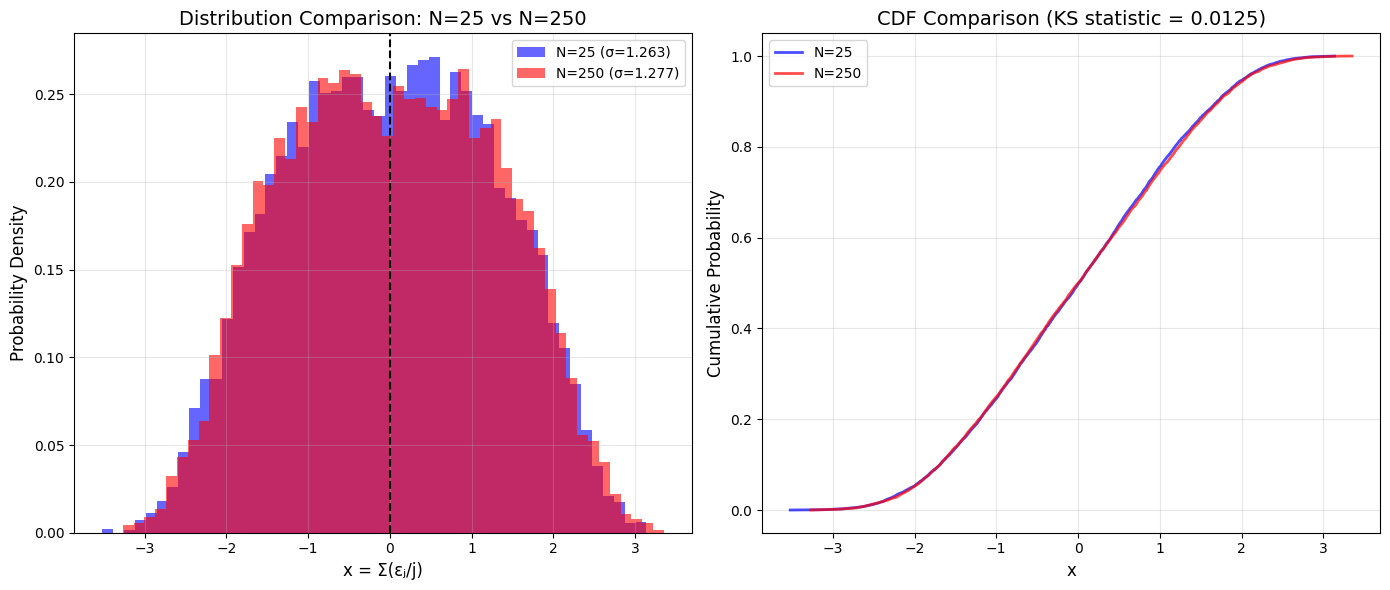


=== Statistics Comparison ===
N=25:  Mean = -0.001738, Std = 1.263219
N=250: Mean = 0.007325, Std = 1.277496

Std Dev ratio: 1.0113


In [183]:
# Compare distributions for N=25 and N=250 using KS test

# First, regenerate N=25 data (save it before running N=250)
N_harmonic_25 = 25
epsilon_25 = r.choice([-1, 1], size=(n_exp, N_harmonic_25))
j_values_25 = np.arange(1, N_harmonic_25 + 1)
x_values_25 = np.sum(epsilon_25 / j_values_25, axis=1)

# N=250 data (already computed)
N_harmonic_250 = 250
epsilon_250 = r.choice([-1, 1], size=(n_exp, N_harmonic_250))
j_values_250 = np.arange(1, N_harmonic_250 + 1)
x_values_250 = np.sum(epsilon_250 / j_values_250, axis=1)

# Kolmogorov-Smirnov test
from scipy.stats import ks_2samp
ks_statistic, ks_pvalue = ks_2samp(x_values_25, x_values_250)

print("=== Kolmogorov-Smirnov Test: N=25 vs N=250 ===")
print(f"H0: Both distributions come from the same underlying distribution")
print(f"KS statistic: {ks_statistic:.6f}")
print(f"p-value: {ks_pvalue:.6f}")
if ks_pvalue > 0.05:
    print("→ Cannot reject H0: Distributions are consistent")
else:
    print("→ Reject H0: Distributions are NOT consistent")

# Visual comparison
plt.figure(figsize=(14, 6))

# Overlapping histograms
plt.subplot(1, 2, 1)
plt.hist(x_values_25, bins=50, density=True, alpha=0.6, color='blue', label=f'N=25 (σ={np.std(x_values_25):.3f})')
plt.hist(x_values_250, bins=50, density=True, alpha=0.6, color='red', label=f'N=250 (σ={np.std(x_values_250):.3f})')
plt.axvline(0, color='black', linestyle='--', linewidth=1.5)
plt.xlabel('x = Σ(εⱼ/j)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution Comparison: N=25 vs N=250', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# CDF comparison
plt.subplot(1, 2, 2)
sorted_25 = np.sort(x_values_25)
sorted_250 = np.sort(x_values_250)
cdf_25 = np.arange(1, len(sorted_25) + 1) / len(sorted_25)
cdf_250 = np.arange(1, len(sorted_250) + 1) / len(sorted_250)

plt.plot(sorted_25, cdf_25, 'b-', linewidth=2, label='N=25', alpha=0.7)
plt.plot(sorted_250, cdf_250, 'r-', linewidth=2, label='N=250', alpha=0.7)
plt.xlabel('x', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.title(f'CDF Comparison (KS statistic = {ks_statistic:.4f})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare statistics
print(f"\n=== Statistics Comparison ===")
print(f"N=25:  Mean = {np.mean(x_values_25):.6f}, Std = {np.std(x_values_25):.6f}")
print(f"N=250: Mean = {np.mean(x_values_250):.6f}, Std = {np.std(x_values_250):.6f}")
print(f"\nStd Dev ratio: {np.std(x_values_250)/np.std(x_values_25):.4f}")

Generating repeated experiments to estimate PDF maximum distribution...

=== Maximum PDF Test (Repeated Sampling) ===
Number of repeated experiments: 1000
Mean of maximum PDF values: 0.2774
Std Dev of maximum PDF values: 0.0076
Standard Error: 0.0002
Theoretical value: 0.25

=== One-Sample t-test ===
H0: Mean of PDF maxima = 0.25
t-statistic: 113.4138
p-value: 0.000000
Degrees of freedom: 999
→ Reject H0: Maximum PDF is NOT consistent with 0.25 (at α=0.05)

95% Confidence Interval: [0.2769, 0.2779]
Does 0.25 fall within CI? False


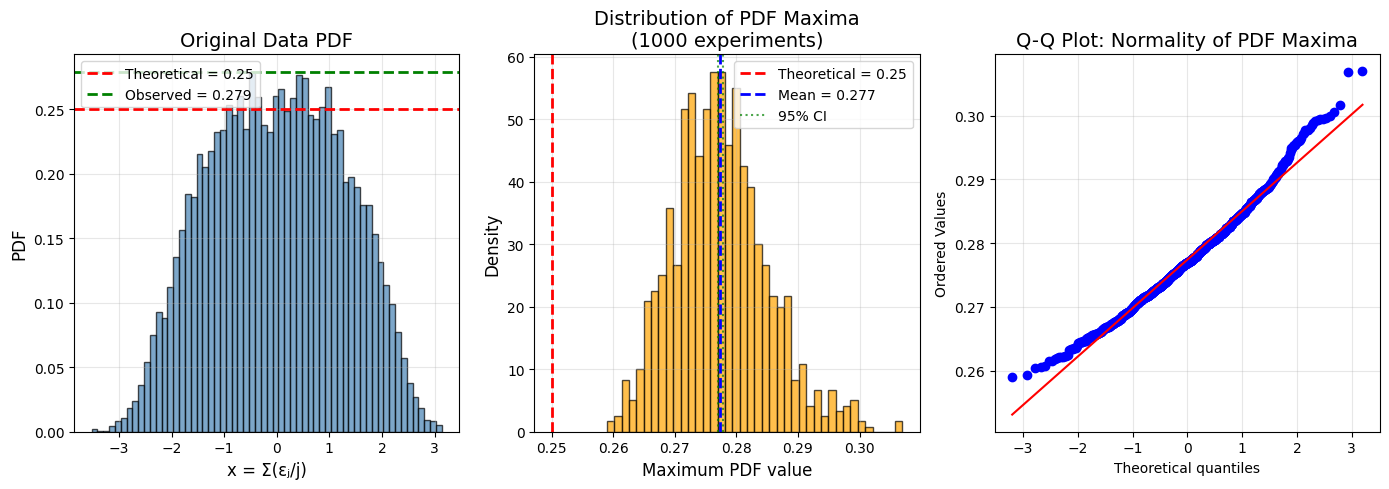


=== Normality Test (Shapiro-Wilk) ===
Statistic: 0.9853
p-value: 0.000000
→ Reject H0: Data may not be normally distributed
  (consider non-parametric test)


In [185]:
# Test if maximum PDF value is consistent with 1/4 (without bootstrap)

# Strategy: Generate multiple experiments, each producing a histogram
# Collect the maximum PDF value from each, then do a t-test

n_samples = 1000  # Number of repeated experiments
max_pdf_values = []

print("Generating repeated experiments to estimate PDF maximum distribution...")

for i in range(n_samples):
    # Generate new data for each experiment
    epsilon_sample = r.choice([-1, 1], size=(n_exp, N_harmonic_25))
    x_sample = np.sum(epsilon_sample / j_values_25, axis=1)
    
    # Get histogram and find maximum PDF
    counts, bins = np.histogram(x_sample, bins=60, density=True)
    max_pdf_values.append(np.max(counts))

max_pdf_values = np.array(max_pdf_values)

# Calculate statistics
mean_max = np.mean(max_pdf_values)
std_max = np.std(max_pdf_values, ddof=1)
se_max = std_max / np.sqrt(n_samples)

print(f"\n=== Maximum PDF Test (Repeated Sampling) ===")
print(f"Number of repeated experiments: {n_samples}")
print(f"Mean of maximum PDF values: {mean_max:.4f}")
print(f"Std Dev of maximum PDF values: {std_max:.4f}")
print(f"Standard Error: {se_max:.4f}")
print(f"Theoretical value: 0.25")

# One-sample t-test: H0: mean of maxima = 0.25
from scipy.stats import ttest_1samp

t_statistic, p_value = ttest_1samp(max_pdf_values, 0.25)

print(f"\n=== One-Sample t-test ===")
print(f"H0: Mean of PDF maxima = 0.25")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"Degrees of freedom: {n_samples - 1}")

if p_value > 0.05:
    print(f"→ Cannot reject H0: Maximum PDF is consistent with 0.25 (at α=0.05)")
else:
    print(f"→ Reject H0: Maximum PDF is NOT consistent with 0.25 (at α=0.05)")

# Calculate confidence interval
from scipy.stats import t as t_dist
ci_level = 0.95
t_critical = t_dist.ppf((1 + ci_level) / 2, n_samples - 1)
ci_lower = mean_max - t_critical * se_max
ci_upper = mean_max + t_critical * se_max

print(f"\n95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Does 0.25 fall within CI? {ci_lower <= 0.25 <= ci_upper}")

# Visualize
plt.figure(figsize=(14, 5))

# Left: Original histogram with observed max
plt.subplot(1, 3, 1)
counts_orig, bins_orig, _ = plt.hist(x_values_25, bins=60, density=True, alpha=0.7, 
                                      color='steelblue', edgecolor='black')
max_pdf_orig = np.max(counts_orig)
plt.axhline(0.25, color='red', linestyle='--', linewidth=2, label='Theoretical = 0.25')
plt.axhline(max_pdf_orig, color='green', linestyle='--', linewidth=2, 
            label=f'Observed = {max_pdf_orig:.3f}')
plt.xlabel('x = Σ(εⱼ/j)', fontsize=12)
plt.ylabel('PDF', fontsize=12)
plt.title('Original Data PDF', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Middle: Distribution of maximum PDF values
plt.subplot(1, 3, 2)
plt.hist(max_pdf_values, bins=40, alpha=0.7, color='orange', edgecolor='black', density=True)
plt.axvline(0.25, color='red', linestyle='--', linewidth=2, label='Theoretical = 0.25')
plt.axvline(mean_max, color='blue', linestyle='--', linewidth=2, 
            label=f'Mean = {mean_max:.3f}')
plt.axvline(ci_lower, color='green', linestyle=':', linewidth=1.5, alpha=0.7)
plt.axvline(ci_upper, color='green', linestyle=':', linewidth=1.5, alpha=0.7,
            label=f'95% CI')
plt.xlabel('Maximum PDF value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title(f'Distribution of PDF Maxima\n({n_samples} experiments)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Right: Q-Q plot for normality check of maxima
plt.subplot(1, 3, 3)
from scipy.stats import probplot
probplot(max_pdf_values, dist="norm", plot=plt)
plt.title('Q-Q Plot: Normality of PDF Maxima', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional normality test (Shapiro-Wilk)
from scipy.stats import shapiro
shapiro_stat, shapiro_p = shapiro(max_pdf_values)
print(f"\n=== Normality Test (Shapiro-Wilk) ===")
print(f"Statistic: {shapiro_stat:.4f}")
print(f"p-value: {shapiro_p:.6f}")
if shapiro_p > 0.05:
    print("→ Cannot reject H0: Data appears normally distributed")
    print("  (t-test is appropriate)")
else:
    print("→ Reject H0: Data may not be normally distributed")
    print("  (consider non-parametric test)")

# Problem 4
### 4.1

In [186]:
dataframe = pd.read_csv('data_BloodPressure.csv', header=0)
ptype, bloodp = dataframe.values.T
dataframe

,# Type,Blood Pressure
0,0,109.5
1,0,123.9
2,0,123.5
3,1,169.7
4,0,114.8
...,...,...
2493,0,125.2
2494,1,154.3
2495,0,119.9
2496,0,126.0


In [193]:
bloodp_healthy = bloodp[ptype == 0]
mean_SBP_healthy = np.mean(bloodp_healthy)
err_SBP_healthy = np.std(bloodp_healthy, ddof=1) / np.sqrt(len(bloodp_healthy))
print(f"Overall Mean SBP = {mean_SBP_healthy:.2f} ± {err_SBP_healthy:.2f} mmHg")

# 95% confidence interval
ci_level = 0.95
t_critical = stats.t.ppf((1 + ci_level) / 2, len(bloodp_healthy) - 1)
ci_lower = mean_SBP_healthy - t_critical * err_SBP_healthy
ci_upper = mean_SBP_healthy + t_critical * err_SBP_healthy
print(f"95% CI for Mean SBP (Healthy): [{ci_lower:.2f}, {ci_upper:.2f}] mmHg")

Overall Mean SBP = 120.66 ± 0.26 mmHg
95% CI for Mean SBP (Healthy): [120.16, 121.17] mmHg


Text(0, 0.5, 'Systolic Blood Pressure (mmHg)')

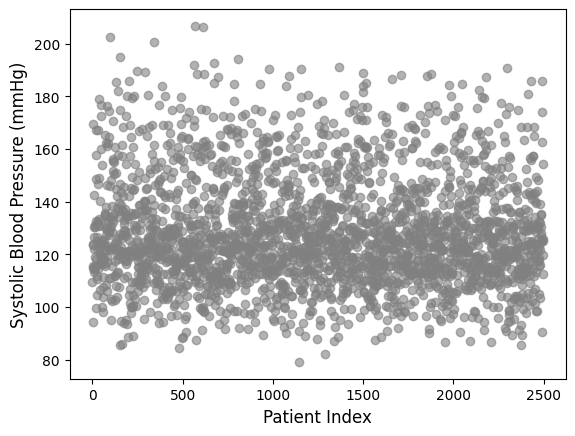

In [199]:
x = np.arange(len(bloodp))
plt.scatter(x, bloodp, alpha=0.6, label='All Patients', color='gray')
plt.xlabel('Patient Index', fontsize=12)
plt.ylabel('Systolic Blood Pressure (mmHg)', fontsize=12)
